In [1]:
import pickle
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
all_pca = pd.read_csv("C:\\Users\\HP\\Desktop\\all_pca.csv")
all_pca

,num,Date,因子
0,0,2008-07-09 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
1,1,2008-07-10 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
2,2,2008-07-11 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
3,3,2008-07-12 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
4,4,2008-07-13 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
...,...,...,...
4342,4342,2020-05-29 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4343,4343,2020-05-30 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4344,4344,2020-05-31 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4345,4345,2020-06-01 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...


In [3]:
print((all_pca["Date"][1][0:10]))

2008-07-10


In [4]:
# 調整 PCA 格式
del all_pca["num"]
for i in range(len(all_pca)):
    all_pca["Date"][i] = all_pca["Date"][i][0:10]
all_pca

,Date,因子
0,2008-07-09,[-4.517539 -1.0637348 -0.22452042 -0.640718...
1,2008-07-10,[-4.517539 -1.0637348 -0.22452042 -0.640718...
2,2008-07-11,[-4.517539 -1.0637348 -0.22452042 -0.640718...
3,2008-07-12,[-4.517539 -1.0637348 -0.22452042 -0.640718...
4,2008-07-13,[-4.517539 -1.0637348 -0.22452042 -0.640718...
...,...,...
4342,2020-05-29,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4343,2020-05-30,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4344,2020-05-31,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4345,2020-06-01,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...


In [5]:
all_pca.Date = all_pca.Date.astype(str)
all_pca.Date

0       2008-07-09
1       2008-07-10
2       2008-07-11
3       2008-07-12
4       2008-07-13
           ...    
4342    2020-05-29
4343    2020-05-30
4344    2020-05-31
4345    2020-06-01
4346    2020-06-02
Name: Date, Length: 4347, dtype: object

In [6]:
# 合併名稱要相同
df_raw = pd.read_excel("C:\\Users\\HP\\Desktop\\野村全球高股息\\野村全球品牌基金.xlsx", )
df_raw = df_raw.rename(columns={'年月日': 'Date'})

# 格式也要相同
def to_date(df):
    df["Date"] = datetime.datetime.strptime(str(df["Date"])[0:10], "%Y/%m/%d")
    return df
df_raw = df_raw.apply(to_date, axis=1)
df_raw

,Date,幣別,淨值(元)
0,2020-06-08,NTD,31.84
1,2020-06-05,NTD,31.69
2,2020-06-04,NTD,31.12
3,2020-06-03,NTD,31.29
4,2020-06-02,NTD,30.85
...,...,...,...
2775,2009-02-06,NTD,7.73
2776,2009-02-05,NTD,7.39
2777,2009-02-04,NTD,7.36
2778,2009-02-03,NTD,7.23


In [7]:
df_raw.Date = df_raw.Date.astype(str)
df_raw.Date

0       2020-06-08
1       2020-06-05
2       2020-06-04
3       2020-06-03
4       2020-06-02
           ...    
2775    2009-02-06
2776    2009-02-05
2777    2009-02-04
2778    2009-02-03
2779    2009-02-02
Name: Date, Length: 2780, dtype: object

In [8]:
all_df = pd.merge(df_raw, all_pca, on='Date')
all_df

,Date,幣別,淨值(元),因子
0,2020-06-02,NTD,30.85,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
1,2020-06-01,NTD,30.49,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
2,2020-05-29,NTD,30.27,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
3,2020-05-28,NTD,30.14,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4,2020-05-27,NTD,29.93,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
...,...,...,...,...
2771,2009-02-06,NTD,7.73,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2772,2009-02-05,NTD,7.39,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2773,2009-02-04,NTD,7.36,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2774,2009-02-03,NTD,7.23,[-4.5175557 -1.0637038 -0.22452757 -0.640680...


In [9]:
# 把 PCA Factor 拆成五項
for i in range(5):
    all_df["x" + str(i+1)] = 0.0
for i in range(len(all_df)):
    temp = all_df["因子"][i].replace("[", "").replace("]", "").split()
    # print(temp)
    for j in range(5):
        all_df["x" + str(j+1)][i] = float(temp[j])
df_rate = all_df.copy()
del df_rate["因子"]
df_rate

<ipython-input-9-c95cf49e80a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["x" + str(j+1)][i] = float(temp[j])


,Date,幣別,淨值(元),x1,x2,x3,x4,x5
0,2020-06-02,NTD,30.85,-4.698641,-1.447645,-4.712656,20.986408,5.384891
1,2020-06-01,NTD,30.49,-4.698641,-1.447645,-4.712656,20.986408,5.384891
2,2020-05-29,NTD,30.27,-4.698641,-1.447645,-4.712656,20.986408,5.384891
3,2020-05-28,NTD,30.14,-4.698641,-1.447645,-4.712656,20.986408,5.384891
4,2020-05-27,NTD,29.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891
...,...,...,...,...,...,...,...,...
2771,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2772,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2773,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2774,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782


In [10]:
df_rate["5day+growth"] = 0
df_rate["5day-growth"] = 0
df_rate['BuyOrNot'] = 0
df_rate

,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot
0,2020-06-02,NTD,30.85,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
1,2020-06-01,NTD,30.49,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
2,2020-05-29,NTD,30.27,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
3,2020-05-28,NTD,30.14,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
4,2020-05-27,NTD,29.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2771,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2772,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2773,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2774,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0


In [11]:
# 低檔投資法是與10天前比較
# 但用 PCA 要預測 5天後
df_rate["5day+growth"] = (df_rate.shift(5)["淨值(元)"] - df_rate["淨值(元)"])/df_rate["淨值(元)"]
df_rate["5day-growth"] = (df_rate["淨值(元)"] - df_rate.shift(-5)["淨值(元)"])/df_rate.shift(-5)["淨值(元)"]
# df_rate = df_rate[5:len(all_df)]  # 刪除平移10天導致的Na
df_rate = df_rate.reset_index()
df_rate[0:20]

,index,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot
0,0,2020-06-02,NTD,30.85,-4.698641,-1.447645,-4.712656,20.986408,5.384891,NaN,0.038022,0
1,1,2020-06-01,NTD,30.49,-4.698641,-1.447645,-4.712656,20.986408,5.384891,NaN,0.036018,0
2,2,2020-05-29,NTD,30.27,-4.698641,-1.447645,-4.712656,20.986408,5.384891,NaN,0.029942,0
3,3,2020-05-28,NTD,30.14,-4.698641,-1.447645,-4.712656,20.986408,5.384891,NaN,0.018243,0
4,4,2020-05-27,NTD,29.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891,NaN,0.026406,0
5,5,2020-05-26,NTD,29.72,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.038022,0.018855,0
6,6,2020-05-22,NTD,29.43,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.036018,0.034810,0
7,7,2020-05-21,NTD,29.39,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.029942,0.043679,0
8,8,2020-05-20,NTD,29.60,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.018243,0.054882,0
9,9,2020-05-19,NTD,29.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.026406,0.031117,0


In [12]:
# 標記漲跌跟交易訊號
# 若 5 天後漲
df_rate['5day_after'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
for i in range(len(df_rate)):
    if df_rate["5day+growth"][i] >= 0.05:
        # df_rate.loc[i, '5day_after'] = 1
        for j in range(10):
            df_rate.loc[i+j, '5day_after'] = 1

df_rate['5day_before'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
for i in range(len(df_rate)):
    if df_rate["5day-growth"][i] <= -0.01:
        df_rate.loc[i, '5day_before'] = 1
        # for j in range(10):
        #    df_rate.loc[i+j, '5day_before'] = 1

df_rate['BuyOrNot'] = 0
for i in range(len(df_rate)):
    if df_rate['5day_after'][i] == 1 or df_rate['5day_before'][i] == 1:
        df_rate.loc[i, 'BuyOrNot'] = 1
    
    #if df_rate["5day+growth"][i] - df_rate["5day-growth"][i] >= 0.045:
    #    df_rate.loc[i, 'BuyOrNot'] = 1


df_rate = df_rate.copy()
df_rate = df_rate.dropna()
df_rate[0:20]

,index,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot,5day_after,5day_before
5,5.0,2020-05-26,NTD,29.72,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.038022,0.018855,0,0.0,0
6,6.0,2020-05-22,NTD,29.43,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.036018,0.034810,0,0.0,0
7,7.0,2020-05-21,NTD,29.39,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.029942,0.043679,0,0.0,0
8,8.0,2020-05-20,NTD,29.60,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.018243,0.054882,0,0.0,0
9,9.0,2020-05-19,NTD,29.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.026406,0.031117,0,0.0,0
10,10.0,2020-05-18,NTD,29.17,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.018855,0.019217,0,0.0,0
11,11.0,2020-05-15,NTD,28.44,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.034810,-0.006636,0,0.0,0
12,12.0,2020-05-14,NTD,28.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.043679,-0.003186,0,0.0,0
13,13.0,2020-05-13,NTD,28.06,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.054882,0.011900,1,1.0,0
14,14.0,2020-05-12,NTD,28.28,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.031117,0.021307,1,1.0,0


In [13]:
# df_rate = df_rate[df_rate["Date"] >= '2015-01-01']
df_rate = df_rate.reset_index()
del df_rate["index"]
df_rate

,level_0,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot,5day_after,5day_before
0,5,2020-05-26,NTD,29.72,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.038022,0.018855,0,0.0,0
1,6,2020-05-22,NTD,29.43,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.036018,0.034810,0,0.0,0
2,7,2020-05-21,NTD,29.39,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.029942,0.043679,0,0.0,0
3,8,2020-05-20,NTD,29.60,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.018243,0.054882,0,0.0,0
4,9,2020-05-19,NTD,29.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.026406,0.031117,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,2766,2009-02-13,NTD,7.63,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.048493,-0.012937,1,0.0,1
2762,2767,2009-02-12,NTD,7.58,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.025066,0.025710,0,0.0,0
2763,2768,2009-02-11,NTD,7.65,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.039216,0.039402,0,0.0,0
2764,2769,2009-02-10,NTD,7.62,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.026247,0.053942,0,0.0,0


In [40]:
df_rate.to_csv("C:\\Users\\HP\\Desktop\\raw.csv", encoding='utf8')

In [15]:
print("10天後漲超過5%")
buy_times = len(df_rate[df_rate['5day_after'] == 0])
print("沒漲：" + str(buy_times))

buy_times = len(df_rate[df_rate['5day_after'] == 1])
print("漲：" + str(buy_times))
# df_rate[df_rate["10天後跌"] == 1]

10天後漲超過5%
沒漲：2398
漲：368


In [16]:
print("昨天跌超過5%")
buy_times = len(df_rate[df_rate['5day_before'] == 0])
print("沒跌：" + str(buy_times))

buy_times = len(df_rate[df_rate['5day_before'] == 1])
print("跌：" + str(buy_times))
# df_rate[df_rate["1天後跌"] == 1]

昨天跌超過5%
沒跌：2054
跌：712


In [17]:
# 刪除重複項
'''
df_rate = df_rate.sort_values(by=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])
df_rate = df_rate.drop_duplicates(subset=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])

# df_rate = df_rate[["x1", "x2", "x3", "x4", "x5", "BuyOrNot"]]
# df_rate = df_rate.sort_values(by=["Date"])
df_rate
'''

'\ndf_rate = df_rate.sort_values(by=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])\ndf_rate = df_rate.drop_duplicates(subset=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])\n\n# df_rate = df_rate[["x1", "x2", "x3", "x4", "x5", "BuyOrNot"]]\n# df_rate = df_rate.sort_values(by=["Date"])\ndf_rate\n'

In [18]:
print("BuyOrnot = 1")
buy_times = len(df_rate[df_rate["BuyOrNot"] == 1])
print(str(buy_times))
# df_rate[df_rate["BuyOrNot"] == 1]

BuyOrnot = 1
937


In [19]:
# 開始執行
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_rate[["x1", "x2", "x3", "x4", "x5"]], df_rate['BuyOrNot'], 
    test_size=0.3, random_state=0, stratify=df_rate[['BuyOrNot']])
print(X_train)
print(y_train)

             x1        x2        x3         x4        x5
1749  -4.990963 -1.472422 -1.013004  -0.410536 -2.489123
1389  -4.692254 -0.900486 -0.368329  -0.515635 -0.079453
471   19.576925 -0.022726 -0.007094  -0.041077 -0.043019
2325  -4.547967 -1.004660 -0.412265  -0.468726 -0.175939
1662  -4.600147 -0.266288 -0.069879  -0.148989 -0.086075
...         ...       ...       ...        ...       ...
2138  -5.197863 -1.669744 -1.735676  -1.489617 -3.208739
1608  -5.321343 -1.833867 -1.566770  -1.050184 -1.270663
148   -4.698641 -1.447645 -4.712656  20.986408  5.384890
289   19.576925 -0.022726 -0.007094  -0.041077 -0.043019
694   -4.685947 -0.670941  0.015040  -0.162506  0.029852

[1936 rows x 5 columns]
1749    0
1389    0
471     0
2325    0
1662    0
       ..
2138    1
1608    0
148     1
289     0
694     0
Name: BuyOrNot, Length: 1936, dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
from sklearn.svm import SVC
# 徑向基函數核
# svm = SVC(kernel='rbf', gamma=0.7, probability=True)
svm = SVC(kernel='rbf', gamma=0.7, probability=True)

svm.fit(X_train_std,y_train.values)

SVC(gamma=0.7, probability=True)

In [22]:
# 可以印出來看看
# svm.predict(X_test_std)
# y_test.values

In [23]:
#導入依賴包
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()

y_true = y_test.values
y_pred = svm.predict(X_test_std)
y_pred

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
confmat

array([[535,  14],
       [256,  25]], dtype=int64)

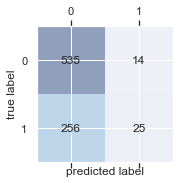

In [24]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [25]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       549
           1       0.64      0.09      0.16       281

    accuracy                           0.67       830
   macro avg       0.66      0.53      0.48       830
weighted avg       0.66      0.67      0.58       830



In [26]:
index_list_I = []
index_list_II = []
for i in range(len(y_test)):
    if y_test[y_test.index[i]] != y_pred[i]:
        # print(y_test.index[i])
        if y_test[y_test.index[i]] == 0:
            index_list_I.append(y_test.index[i])
        else:
            index_list_II.append(y_test.index[i])

In [27]:
# 優化
# 參考 https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.686, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.690, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.685, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.660, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.661, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.682, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.693, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.669, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.669, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.660, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.661, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.661, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.660, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.661, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.661, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.661, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.643, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   21.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [29]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       549
           1       0.61      0.37      0.46       281

    accuracy                           0.70       830
   macro avg       0.67      0.62      0.63       830
weighted avg       0.69      0.70      0.68       830



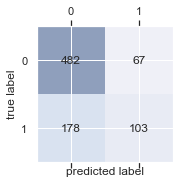

In [30]:
confmat = confusion_matrix(y_true=y_test, y_pred=grid_predictions)
confmat
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [31]:
print(grid_predictions.size)
grid_predictions
X_test

830


,x1,x2,x3,x4,x5
1093,-4.660870,-0.781869,-0.034278,-0.365467,0.035649
0,-4.698641,-1.447645,-4.712656,20.986408,5.384891
2193,-4.721792,-0.794979,-0.284982,-0.665412,-0.330367
1230,-4.935657,-0.695995,-0.509016,-0.712911,-0.295684
939,-4.013519,-0.670227,-0.122434,-0.318118,0.526489
...,...,...,...,...,...
2364,-4.738114,-0.710450,-0.641406,-0.334849,-0.724212
821,-4.667333,-1.093945,-0.455806,-0.471317,-0.067508
2627,-4.517556,-1.063713,-0.224522,-0.640570,0.096791
72,-4.698641,-1.447645,-4.712656,20.986408,5.384891


In [32]:
y_test.index

Int64Index([1093,    0, 2193, 1230,  939, 2619, 1569, 2485, 1244,  446,
            ...
            1713,  365,  284, 2279, 2292, 2364,  821, 2627,   72, 1226],
           dtype='int64', length=830)

In [33]:
index_list_I = []
index_list_II = []
for i in range(len(y_test)):
    if y_test[y_test.index[i]] != grid_predictions[i]:
        # print(y_test.index[i])
        if y_test[y_test.index[i]] == 0:
            index_list_I.append(y_test.index[i])
        else:
            index_list_II.append(y_test.index[i])

In [34]:
# print(type(index_list_I))
print((index_list_I))
index_list_I = sorted(index_list_I)
# print(type(index_list_I))
index_list_I
df_rate.iloc[index_list_I]

[939, 2618, 2448, 2585, 2547, 2447, 1688, 2584, 2061, 2595, 2125, 938, 243, 2569, 2688, 2112, 2597, 2058, 2056, 2146, 1367, 2427, 1374, 2553, 2545, 2642, 2571, 2424, 2548, 2188, 2420, 2446, 2531, 2617, 2043, 2429, 2594, 2041, 1377, 2614, 2574, 2529, 2110, 2523, 2763, 2593, 2184, 2079, 1994, 2085, 2524, 1500, 2681, 241, 2060, 951, 2185, 1375, 2525, 2573, 2615, 1369, 2591, 2541, 2052, 2148, 1501]


,level_0,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot,5day_after,5day_before
241,246,2019-05-17,NTD,28.84,-4.256260,-0.855699,-0.460391,-0.689142,0.110480,-0.015603,0.006983,0,0.0,0
243,248,2019-05-15,NTD,28.70,-4.256260,-0.855699,-0.460391,-0.689142,0.110480,0.003136,-0.004164,0,0.0,0
938,943,2016-06-21,NTD,18.90,-4.013519,-0.670227,-0.122434,-0.318118,0.526489,-0.052381,0.043622,0,0.0,0
939,944,2016-06-20,NTD,18.83,-4.013519,-0.670227,-0.122434,-0.318118,0.526489,-0.068508,0.025041,0,0.0,0
951,956,2016-06-01,NTD,18.88,-4.013519,-0.670227,-0.122434,-0.318118,0.526489,0.018538,0.004790,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2623,2009-09-07,NTD,11.64,-4.517556,-1.063713,-0.224522,-0.640570,0.096791,0.031787,0.011295,0,0.0,0
2642,2647,2009-08-03,NTD,11.18,-4.517555,-1.063769,-0.224691,-0.640182,0.097789,0.008050,0.054717,0,0.0,0
2681,2686,2009-06-09,NTD,10.05,-4.517555,-1.063769,-0.224691,-0.640182,0.097789,-0.031841,-0.001986,0,0.0,0
2688,2693,2009-06-01,NTD,10.01,-4.517555,-1.063769,-0.224691,-0.640182,0.097789,0.015984,0.061506,0,0.0,0


In [35]:
index_list_II = sorted(index_list_II)
print((index_list_II))
df_rate.iloc[index_list_II]

[8, 10, 14, 15, 23, 37, 39, 42, 46, 49, 50, 51, 52, 58, 60, 76, 106, 136, 161, 171, 177, 179, 184, 189, 230, 231, 232, 234, 235, 325, 326, 334, 345, 349, 350, 351, 363, 366, 374, 376, 378, 413, 423, 425, 426, 446, 450, 451, 504, 507, 511, 520, 522, 538, 539, 625, 684, 685, 701, 702, 838, 846, 868, 880, 888, 889, 906, 908, 919, 931, 933, 958, 960, 986, 996, 1016, 1038, 1039, 1041, 1042, 1044, 1045, 1046, 1047, 1061, 1062, 1065, 1084, 1087, 1103, 1116, 1117, 1122, 1129, 1140, 1141, 1146, 1147, 1176, 1177, 1179, 1185, 1198, 1224, 1226, 1240, 1251, 1284, 1290, 1305, 1306, 1307, 1309, 1310, 1351, 1400, 1415, 1465, 1495, 1522, 1529, 1530, 1532, 1558, 1629, 1672, 1674, 1719, 1720, 1721, 1728, 1736, 1739, 1753, 1755, 1771, 1789, 1818, 1821, 1822, 1823, 1832, 1834, 1835, 1851, 1852, 1854, 1856, 1906, 1909, 1912, 1917, 1918, 1927, 1933, 1940, 1946, 1947, 1950, 1973, 1976, 1985, 2003, 2193, 2240, 2252, 2279, 2317, 2318, 2319, 2374, 2375, 2382, 2383, 2384, 2385, 2401, 2403]


,level_0,Date,幣別,淨值(元),x1,x2,x3,x4,x5,5day+growth,5day-growth,BuyOrNot,5day_after,5day_before
8,13,2020-05-13,NTD,28.06,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.054882,0.011900,1,1.0,0
10,15,2020-05-11,NTD,28.62,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.019217,0.040727,1,1.0,0
14,19,2020-05-05,NTD,27.69,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.021307,-0.004315,1,1.0,0
15,20,2020-05-04,NTD,27.50,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.040727,0.000728,1,1.0,0
23,28,2020-04-21,NTD,26.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0.027107,-0.018228,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,2388,2010-08-13,NTD,13.73,-4.947465,-0.835600,-0.426214,-0.587307,-0.261340,-0.002185,-0.033779,1,0.0,1
2384,2389,2010-08-12,NTD,13.75,-4.947465,-0.835600,-0.426214,-0.587307,-0.261340,0.005818,-0.041812,1,0.0,1
2385,2390,2010-08-11,NTD,13.83,-4.836190,-0.497323,-0.409844,-0.169320,0.025953,0.012292,-0.036237,1,0.0,1
2401,2406,2010-07-20,NTD,13.41,-4.836190,-0.497323,-0.409844,-0.169320,0.025953,0.042506,-0.019737,1,0.0,1


In [41]:
df_final = df_rate.copy()
for i in range(len(y_test)):
    df_final.loc[y_test.index[i], "BuyOrNot"] = grid_predictions[i]
df_final[0:20]

df_final.to_csv("C:\\Users\\HP\\Desktop\\svm_label.csv", encoding='utf8')